# Training a Simple Traffic Sign Classifier 

__Objective__: Create a CNN (Convolutional Neural Network) model. Use this model to classify traffic signs.

__Workflow__:
1. Using `numpy` to load your dataset for training.
    - use `numpy.load` method to load data and labels matrices 
2.  Create a CNN with these specifications:
    - Input Dimensions of 134 x 128 x 3 
    - Two Convolution Layers (Kernel Size 5x5). The first and second with 32 filters. Use `ReLU` as the activation function.
    - Max Pooling of size 5 x 5
    - Flaten the model using Keras' `Flatten()` class
    - Add a Dense Layer comprising of 64 outputs
    - Dropout Layer with Dropout Rate of 0.2
    - Add the final Dense Layer that indicates the class probabilities
3.  Train this CNN on the `Traffic Sign` dataset your prepared in Step 2
    - Train for at least 30 Epochs 
4.  Plot graphs showing how your training and validation loss and accuracy changed with respect to the Epochs completed. 
5.  Save your model, you will be using it in the second milestone.
6.  Test your model on some random samples from the test dataset.

__Deliverable__:

The deliverable is a Jupyter Notebook documenting your workflow as you take the `Traffic Sign` dataset, view samples, convert it into the proper shape/format as required by your deep learning library. You are required to train the model using the specifications provided. You should save your model as you'll need it for further analysis in the second milestone.

In [1]:
# improt librares
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten, Dense

from plot_keras_history import plot_history
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from tqdm.keras import TqdmCallback

In [2]:
# defintions
EPOCHS = 30
BS = 100
MODEL_NAME = 'cnn-traffic-sign.h5'

In [3]:
dataset = np.load('traffic_sign.npz')
data = dataset['data']
labels = dataset['labels']

(train_X, test_X, train_Y, test_Y) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

In [4]:
def get_model(input_shape, num_of_class):
    model = Sequential()
    model.add(Conv2D(32, (5, 5),activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(5, 5)))
    
    model.add(Conv2D(32, (5, 5),activation='relu'))
    model.add(MaxPooling2D(pool_size=(5, 5)))
    
    model.add(Flatten())  
    model.add(Dense(64, activation='relu',))
    model.add(Dropout(0.2))
    model.add(Dense(num_of_class, activation='softmax'))
     
    model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    
    return model

In [5]:
model = get_model(data[0,:].shape, labels.shape[1])

train_aug = ImageDataGenerator(
	rotation_range=15,
	fill_mode="nearest")

es = EarlyStopping(monitor='val_loss', 
                   patience=5, 
                   min_delta=0.001,
                   verbose=1,
                   restore_best_weights=True,
                   mode='min')

history = model.fit(train_aug.flow(train_X, train_Y, batch_size=BS),
    #steps_per_epoch=np.floor(len(data) // BS),
    validation_data=(test_X, test_Y),
                    verbose=0,
    validation_steps=np.floor(len(test_X) // BS),
      callbacks=[es,TqdmCallback(verbose=1, desc='DL training')],
    epochs=EPOCHS)
model.save(MODEL_NAME)

DL training: 0epoch [00:00, ?epoch/s]

DL training: 0batch [00:00, ?batch/s]

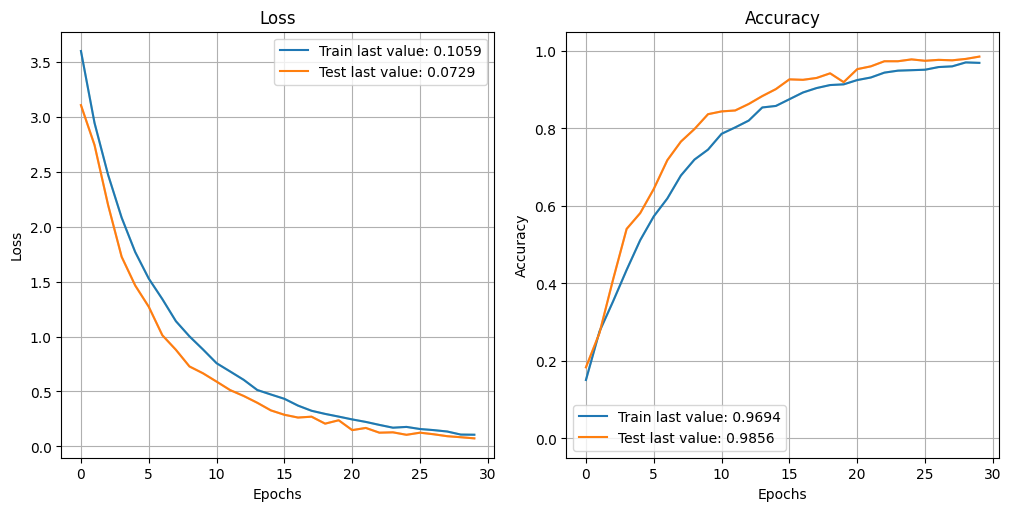

In [6]:
plot_history(history.history)
plt.show()

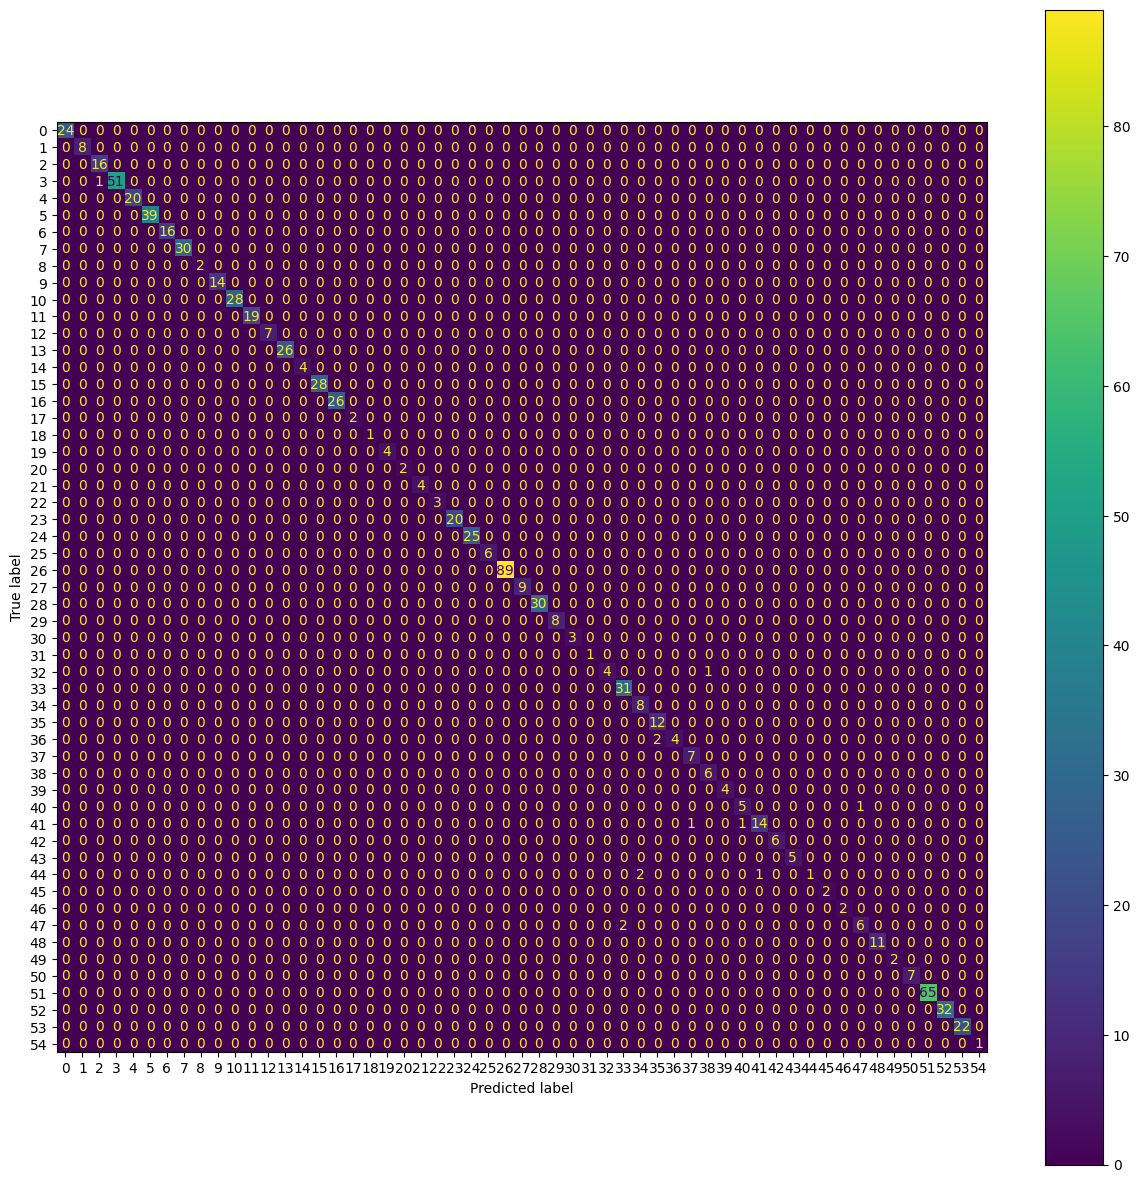

In [8]:
pred_idxs = model.predict(test_X, batch_size=BS)
pred_idxs = np.argmax(pred_idxs, axis=1)

cm = confusion_matrix(test_Y.argmax(axis=1), pred_idxs)
fig, ax = plt.subplots(figsize=(15,15))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
plt.show()

In [9]:
cr = classification_report(test_Y.argmax(axis=1), pred_idxs)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00         8
           2       0.94      1.00      0.97        16
           3       1.00      0.98      0.99        52
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        39
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        30
           8       1.00      1.00      1.00         2
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00        28
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00        28
          17       1.00      1.00      1.00        26
          18       1.00    

$\color{white}{\text{DON"T JUST COPY THIS NOTEBOOK - USE JUST TO CHECK SOLUTION AND THEN SUBMIT YOUR OWN!}}$